In [4]:
# Importieren der benötigten Libraries
from sklearn.datasets import make_blobs, load_digits
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Aufgabe 1.2 Klassifikation

## a) Datensatzerstellung
Erstellen Sie einen synthetischen Datensatz zweier gaußverteilten Cluster. 
Der Datensatz soll dabei insgesamt *500 Stichproben* besitzen und die Clusterzentren in den Punkten *(−1.5, −1.5)* und *(1.5, 1.5)* liegen. 
Sie können hierfür die Funktion [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) verwenden. Eine Visualisierung der generierten Daten kann z.B. über [matplotlib.pyplit.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) vorgenommen werden.

[[ 2.82778270e+00  1.39871851e+00]
 [-1.53928282e+00 -2.66809350e+00]
 [-1.35468152e-01 -2.18944918e+00]
 [-2.94653470e+00 -6.99702051e-01]
 [ 7.59308951e-01 -1.54225715e+00]
 [-6.78414288e-01 -1.49470735e+00]
 [-7.39604059e-01  1.90149906e+00]
 [ 1.09405827e+00  2.22436850e+00]
 [ 1.68392549e+00  1.11451024e+00]
 [ 2.17057045e+00  7.92494302e-01]
 [ 1.44386698e+00  1.49861496e+00]
 [-5.79141176e-01 -1.18127235e+00]
 [ 6.63235949e-01 -1.63472051e-01]
 [ 1.47657689e+00  2.57919473e+00]
 [-1.21955829e+00 -2.49312361e+00]
 [-1.63594970e+00 -3.63108637e-01]
 [-1.59845252e+00 -2.16347829e+00]
 [ 1.94819528e+00  3.19618157e+00]
 [-1.42965294e-01  1.09392820e+00]
 [-1.10399329e+00 -2.59306151e+00]
 [-1.34505257e+00 -1.12183748e+00]
 [-2.30340966e+00 -2.18954978e+00]
 [ 2.87098901e+00  9.90156758e-01]
 [ 1.86448125e+00  2.97132196e+00]
 [-8.08461249e-01 -8.05250856e-01]
 [ 1.78690449e+00 -8.20594276e-01]
 [-7.13672038e-01 -1.96641910e+00]
 [-2.39656938e-03 -2.77666955e-01]
 [-1.76800337e+00 -6

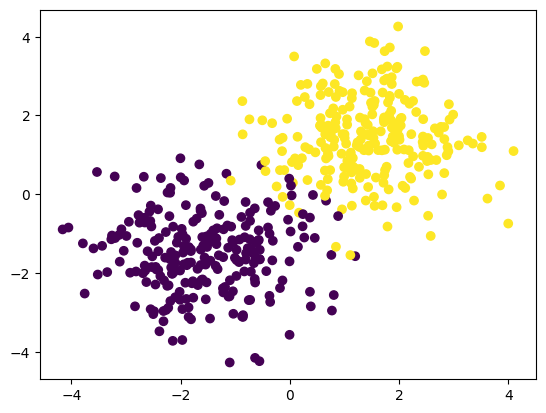

In [15]:
# Datensatz erstellen bestehend aus Datenpunkten X und Labels y
X, y = make_blobs(n_samples=500, centers=np.array([[-1.5, -1.5], [1.5, 1.5]], ), n_features=2,
                  random_state=0)
print(X)
print(y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


## b) Einfache Vorhersage

Unser Ziel ist es zu bestimmen, ob ein Datenpunkt der Klasse A ($\hat{y}=0$) oder B ($\hat{y}=1$) angehört. Aus der Betrachtung der Daten könnten wir einige handgeschriebene Regeln ableiten.
Weisen Sie einen Datenpunkt der Klasse A in der Funktion ```predict_1(x)``` zu, wenn er sich im dritten Quadranten (unter der x-Achse und links der y-Achse) befindet.
Alle anderen Punkte werden der Klasse B zugewiesen.

In [19]:
# Prüfe ob der Datenpunkt x im dritten Quadranten liegt
def predict_1(x: np.ndarray) -> int:
    if (x[0] < 0) & (x[1] < 0):
        return 1
    else :
        return 0

Wir verwenden nun die definierte Funktion ```predict_1(x)``` um eine Vorhersage für jeden Datenpunkt $x\in X$ zu treffen. Dies geschieht in diesem Fall über eine for-Schleife. Vorhersagen werden in einer Liste gesammelt und anschließend in ein Numpy-Array konvertiert, welches sich zur Berechnung von Metriken besser eignet.

Hinweis: Bei größeren Datenmengen werden in der Regel die Datenpunkte nicht einzeln über Schleifen verarbeitet, sondern in größeren Gruppen, sogenannten Batches. Dies erhöht die Verarbeitungsgeschwindigkeit und lastet vorhandene Hardware besser aus.

In [30]:
# Berechne Vorhersagen für alle Datenpunkte
nodeList = list()
for node in X:
    nodeList.append(predict_1(node))
nodeArray = np.array(nodeList)

## c) Genauigkeit
Implementieren Sie die Funktion ```accuracy(y_true, y_pred)```, um die Genauigkeit unserer Vorhersagefunktion zu bestimmen.

In [ ]:
# Berechne die Genauigkeit (Accuracy) der Vorhersagen y_pred bzgl. den korrekten Labels y_true
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    numberOfCorrectPredictions = 0
    counter = 0
    while counter < len(y_true):
        if y_true[counter] == y_pred[counter]:
                numberOfCorrectPredictions +=1
        counter +=1
    print(numberOfCorrectPredictions)
    print(len(y_true))
    return (numberOfCorrectPredictions/len(y_true)) * 100
print(accuracy(y, nodeArray))


37
500
7.3999999999999995


## d) Verbesserte Vorhersage

Wir können nun die Vorhersagefunktion verfeinern und z.B. sagen, dass alles unterhalb der Diagonalen ($-x_0 = x_1$) zur Klasse A gehört und sonst zur Klasse B. Implementieren Sie diese Regel in der Funktion ```predict_2(x)```.


In [39]:
# Implementiere die verbesserte Vorhersagefunktion
def predict_2(x: np.ndarray) -> float:
    if x[1] < (x[0] * -1):
        return 1
    else:
        return 0

# Aufgabe 1.3 Regression

Bei einer Regressionsaufgabe (mit einer Zielvariable) ist die Zielvariable kontinuierlich
($y_i \in \mathbb{R}$).
Dies unterscheidet sich sehr von der früheren Klassifizierungsstruktur, da wir jetzt nicht einfach unsere Daten in Klassen trennen und Entscheidungsgrenzen finden können, um die Klassen zu trennen. 

Ein einfaches Beispiel ist die lineare Regression, bei der wir annehmen, dass die Daten $\mathbf{x_i}$
linear mit der Zielvariablen
$y_i$
korreliert sind, wobei wir Koeffizienten $\beta_0, \dots, \beta_{K} \in \mathbb{R}$ verwenden:
\begin{equation}
     y_i = \beta_0 + \beta_1 x_i^1 + \beta_2 x_i^2 + \dots + \beta_{K} x_i^{K}
\end{equation}

und der Superskript den jeweiligen Eingangsvariablen-Index beschreibt.

Für den zweidimensionalen Fall reduziert sich dies auf den klassischen Fall
$ y_i = b + mx_i$
(mit $b=c_0$ von oben).

In [3]:
np.random.seed(42) # Seed setzen, damit Datengenerierung deterministisch ist
data = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 8], [4, 8]], size=500)
outlier = np.random.multivariate_normal(mean=[7, 17], cov=[[2, 1], [1, 2]], size=50)
X = np.concatenate([data[:, 0], outlier[:, 0]]) # Interpretiere erste Dimension als unabhängige Variable (Daten)
y = np.concatenate([data[:, 1], outlier[:, 1]]) # Interpretiere zweite Dimension als abhängige Variable (Vorhersagewert)

<ipython-input-3-64d081034048>:2: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 8], [4, 8]], size=500)


## a) Datensatzvisualisierung

Schreiben Sie eine Methode ```visualize_data(X, y)```, um den generierten Datensatz als Scatter-Plot zu visualisieren.. Verwenden Sie dabei die [Matplotlib](https://matplotlib.org/stable/index.html) Bibliothek und beschriften Sie die x- und y-Achse.

In [44]:
# Visualisieurng der Datenpunkte als Scatter-Plot
def visualize_data(X: np.ndarray, y: np.ndarray) -> None:
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

## b) Regressionsermittlung

Die Regressionskoeffizienten können über folgende Formal bestimmt werden: $\mathbf{\hat{\beta}} = 
( \mathbf{X'}^T \mathbf{X'})^{-1} \mathbf{X'}^T\mathbf{y} \, ,
$
wobei $\mathbf{X}$ um eine Spalte mit Einsen ergänzt wird ($\mathbf{X'} = [\mathbf{1}, \mathbf{X}]$), um die Verschiebung an der y-Achse $\beta_0$ zu berücksichtigen. 


Berechnen Sie in ```perform_linear_regression()``` die Regressionskoeffizienten
 $\hat{\beta}$ mithilfe der Methode der kleinsten Quadrate (KQ-Schätzer).

In [46]:
# Schätzen der Regressionsgeraden beta_hat
def estimate_beta(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_augmented = np.column_stack((np.ones(X.shape[0]), X))

    beta_hat = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
    
    return beta_hat
print(estimate_beta(X, y))

[0.51270909 0.14282791 0.13412925]


## c) Vorhersage
Neue Vorhersagen können wir nun wie folgt erhalten: $\mathbf{\hat{y}} = \mathbf{X'} \mathbf{\hat{\beta}} \, .$ 

Verwenden Sie das berechnete $\hat{\beta}$ und geben Sie in ```compute_predictions()``` für jeden Datenpunkt $\mathbf{x_i}$ den zugehörigen Punkt auf der ermittelten Regressionsline $\mathbf{\hat{y_i}}$ an.


In [ ]:
# Berechnung der Vorhersagen mithilfe des Linearen Regressionsmodells
def compute_predictions(X: np.ndarray, beta_hat: np.ndarray) -> np.ndarray:
    X_augmented = np.column_stack((np.ones(X.shape[0]), X))
    return X_augmented @ beta_hat

## d) Fehlerbewertung

Berechnen Sie in der Funktion ```compute_mse()``` die mittlere quadratische Abweichung für die ermittelte Funktion zu den Datenpunkten.

In [ ]:
# Berechne den Mean Squared Error (MSE)
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
